In [166]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time

In [167]:
df = pd.read_csv('OnlineRetailShopGermany.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


In [168]:
df.shape

(9495, 8)

In [169]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [170]:
print (df.isnull().values.any())
#print (df.isnull().sum())

False


In [171]:
missing_value = ["NaN", "NONE", "None", "nan", "none", "n/a", "na", " "]
df = pd.read_csv('OnlineRetailShopGermany.csv', na_values = missing_value)
print (df.isnull().sum())
# print (len(df[df.Description.isin(missing_value)]))
# df[df.Description.isin(missing_value)]

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [172]:
df['Description'] = df['Description'].str.strip() #removes spaces from beginning and end

In [173]:
# ranking the top 10 best-selling items
df.Description.value_counts(normalize=True)[:10]

POSTAGE                               0.040337
ROUND SNACK BOXES SET OF4 WOODLAND    0.012638
REGENCY CAKESTAND 3 TIER              0.008531
ROUND SNACK BOXES SET OF 4 FRUITS     0.008215
PLASTERS IN TIN WOODLAND ANIMALS      0.007056
WOODLAND CHARLOTTE BAG                0.006214
PLASTERS IN TIN CIRCUS PARADE         0.006003
PLASTERS IN TIN SPACEBOY              0.005371
6 RIBBONS RUSTIC CHARM                0.005266
SPACEBOY LUNCH BOX                    0.005055
Name: Description, dtype: float64

In [174]:
df.drop(df[df['Description'] == 'POSTAGE'].index, inplace = True)
df.shape

(9112, 8)

In [175]:
# # Outliers
# quantile1, quantile3= np.percentile(df['Quantity'],[20,80])
# print(quantile1,quantile3)

# # IQR
# iqr_value=quantile3-quantile1
# print(iqr_value)

# # lower bound value and higher bound value
# lower_bound_val = quantile1 -(1.5 * iqr_value) 
# upper_bound_val = quantile3 +(1.5 * iqr_value)
# print(lower_bound_val,upper_bound_val)

# df['Quantity'] = np.where(df['Quantity']>=upper_bound_val, np.nan, df['Quantity'])
# df['Quantity'] = np.where(df['Quantity']<=lower_bound_val-1, np.nan, df['Quantity'])

In [176]:
# Select duplicate rows except first occurrence based on all columns
duplicateRows = df[df.duplicated()]
# print(duplicateRows.head())
df = df.drop_duplicates()

[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Percentage')]

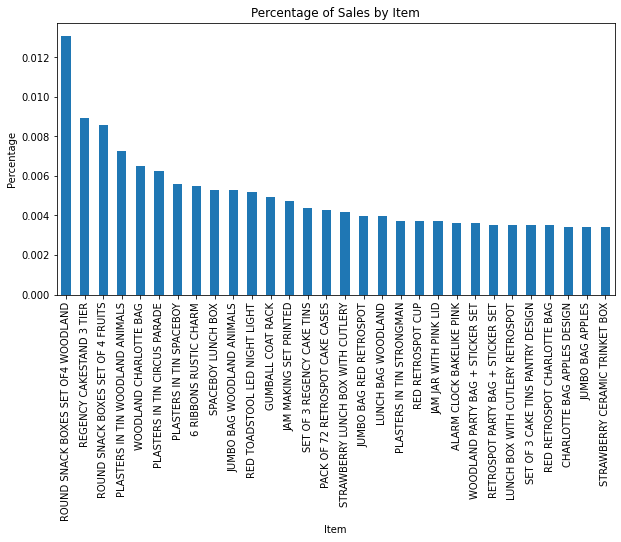

In [177]:
# create a bar chart, rank by percentage
df.Description.value_counts(normalize=True)[:30].plot(kind="bar", figsize=(10,5), title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")

[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Total Number')]

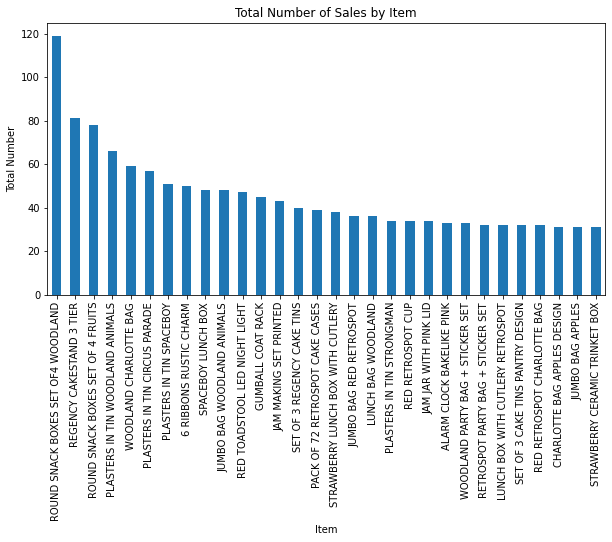

In [178]:
# create a bar chart, rank by value
df.Description.value_counts()[:30].plot(kind="bar", figsize=(10,5), title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")

In [179]:
df2 = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [180]:
df2.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
def convertToZeroOne(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df3 = df2.applymap(convertToZeroOne)

In [182]:
df3.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
start_time = time.time()
frequent_itemsets = apriori(df3, min_support=0.04, use_colnames=True)
end_time = time.time()
frequent_itemsets

,support,itemsets
0,0.079796,(6 RIBBONS RUSTIC CHARM)
1,0.054329,(ALARM CLOCK BAKELIKE PINK)
2,0.050934,(CHARLOTTE BAG APPLES DESIGN)
3,0.047538,(COFFEE MUG APPLES DESIGN)
4,0.049236,(FAWN BLUE HOT WATER BOTTLE)
5,0.056027,(GUMBALL COAT RACK)
6,0.044143,(IVORY KITCHEN SCALES)
7,0.049236,(JAM JAR WITH PINK LID)
8,0.071307,(JAM MAKING SET PRINTED)
9,0.047538,(JUMBO BAG APPLES)


In [184]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.106961,0.089983,0.052632,0.492063,5.468404,0.043007,1.791596
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.089983,0.106961,0.052632,0.584906,5.468404,0.043007,2.151412
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN CIRCUS PARADE),0.190153,0.089983,0.044143,0.232143,2.579852,0.027032,1.185138
3,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.089983,0.190153,0.044143,0.490566,2.579852,0.027032,1.589700
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.106961,0.083192,0.047538,0.444444,5.342404,0.038640,1.650255


In [185]:
#Filtering rules based on condition
rules[(rules['lift'] >= 0.5) & (rules['confidence'] >= 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.106961,0.089983,0.052632,0.492063,5.468404,0.043007,1.791596
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.089983,0.106961,0.052632,0.584906,5.468404,0.043007,2.151412
3,(PLASTERS IN TIN CIRCUS PARADE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.089983,0.190153,0.044143,0.490566,2.579852,0.027032,1.589700
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.106961,0.083192,0.047538,0.444444,5.342404,0.038640,1.650255
5,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.083192,0.106961,0.047538,0.571429,5.342404,0.038640,2.083758
6,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.106961,0.190153,0.057725,0.539683,2.838152,0.037386,1.759323
7,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.190153,0.106961,0.057725,0.303571,2.838152,0.037386,1.282312
8,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.054329,0.098472,0.045840,0.843750,8.568427,0.040490,5.769779
9,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.098472,0.054329,0.045840,0.465517,8.568427,0.040490,1.769319
10,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.190153,0.122241,0.101868,0.535714,4.382440,0.078623,1.890558


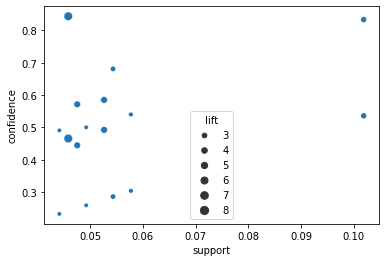

In [186]:
# Import seaborn under its standard alias
import seaborn as sns
import matplotlib.pyplot as plt


# Generate scatterplot using support and confidence
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

In [187]:
print(end_time-start_time)

0.05188727378845215
